In [189]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
train_2_dataset = pd.read_csv("./train2.csv")

C:\Users\reach\AppData\Local\Temp\ipykernel_39288\1974997692.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  train_2_dataset = pd.read_csv("./train2.csv")


In [191]:
train_3_dataset = pd.read_csv('./train3.csv')
train_3_dataset

C:\Users\reach\AppData\Local\Temp\ipykernel_39288\85371332.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  train_3_dataset = pd.read_csv('./train3.csv')


,security_product_name,machine_version,app_version,av_sig_version,is_beta,rtp_state,is_sxs_passive,default_browser,av_status,av_prod_installed,...,secure_boot_status,wim_boot_status,virtual_dev_status,touch_support,pen_support,aoac_support,is_gamer,region_id,malware_status,machine_id
0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1094.0,0,7.0,0,NaN,53447.0,1.0,...,0,0.0,0.0,1,0,1.0,1.0,3.0,1,9421691
1,win8defender,1.1.15100.1,4.18.1807.18075,1.273.658.0,0,7.0,0,NaN,53447.0,1.0,...,1,NaN,0.0,0,0,0.0,0.0,3.0,1,9421692
2,win8defender,1.1.15200.1,4.18.1807.18075,1.275.226.0,0,7.0,0,NaN,53447.0,1.0,...,0,NaN,0.0,0,0,0.0,0.0,1.0,1,9421697
3,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1420.0,0,7.0,0,NaN,53447.0,1.0,...,0,0.0,0.0,0,0,0.0,0.0,10.0,1,9421699
4,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1311.0,0,7.0,0,NaN,53447.0,1.0,...,0,NaN,0.0,0,0,0.0,0.0,10.0,1,9421700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300007,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1638.0,0,7.0,0,NaN,53447.0,1.0,...,0,NaN,0.0,0,0,0.0,1.0,10.0,1,9921475
300008,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,...,0,NaN,0.0,0,0,0.0,NaN,NaN,1,9921476
300009,win8defender,1.1.14600.4,4.13.17134.228,1.263.48.0,0,0.0,0,NaN,43807.0,2.0,...,0,0.0,0.0,0,0,0.0,0.0,5.0,1,9921478
300010,win8defender,1.1.15000.2,4.16.17656.18052,1.271.711.0,0,7.0,0,NaN,53447.0,1.0,...,1,NaN,0.0,0,0,0.0,0.0,1.0,1,9921482


In [192]:
train_combined = pd.concat([train_2_dataset,train_3_dataset],ignore_index= True)
train_combined.to_csv("combined_train_data_23.csv")

### Combined Train2 and Train3 csv files

In [193]:
train_data = pd.read_csv("combined_train_data_23.csv")
len(train_data[train_data['malware_status']==1]),len(train_data[train_data['malware_status']==0])

C:\Users\reach\AppData\Local\Temp\ipykernel_39288\2351217236.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("combined_train_data_23.csv")


(300012, 299810)

In [194]:
len(train_data)

599822

### Set Random Seed and Shuffle Rows

In [195]:
tf.random.set_seed(42)
train_data = train_data.sample(frac = 1,ignore_index=True)
train_data = train_data.drop('Unnamed: 0',axis = 1)
train_data

,security_product_name,machine_version,app_version,av_sig_version,is_beta,rtp_state,is_sxs_passive,default_browser,av_status,av_prod_installed,...,secure_boot_status,wim_boot_status,virtual_dev_status,touch_support,pen_support,aoac_support,is_gamer,region_id,malware_status,machine_id
0,win8defender,1.1.14104.0,4.10.14393.0,1.251.1376.0,0,7.0,0,1727.0,9471.0,2.0,...,1,0.0,0.0,0,0,0.0,0.0,1.0,0,8972659
1,win8defender,1.1.14800.3,4.14.17639.18041,1.267.168.0,0,7.0,0,NaN,62773.0,1.0,...,0,0.0,0.0,0,0,0.0,0.0,1.0,1,9838215
2,win8defender,1.1.15200.1,4.18.1807.18075,1.275.441.0,0,7.0,0,NaN,53447.0,1.0,...,0,NaN,0.0,0,0,0.0,0.0,3.0,1,9665669
3,win8defender,1.1.15200.1,4.12.17007.18022,1.275.568.0,0,7.0,0,NaN,53447.0,1.0,...,1,NaN,0.0,0,0,0.0,0.0,3.0,0,9335123
4,win8defender,1.1.15100.1,4.18.1807.18075,1.273.802.0,0,7.0,0,NaN,53447.0,1.0,...,0,NaN,0.0,0,0,0.0,0.0,3.0,0,9359229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599817,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1080.0,0,7.0,0,NaN,53447.0,1.0,...,0,NaN,0.0,0,0,0.0,0.0,3.0,1,9638248
599818,win8defender,1.1.15200.1,4.18.1807.18075,1.275.438.0,0,7.0,0,NaN,45380.0,2.0,...,0,NaN,0.0,0,0,0.0,1.0,3.0,1,9766492
599819,win8defender,1.1.15100.1,4.18.1806.18062,1.273.452.0,0,7.0,0,NaN,53447.0,1.0,...,0,NaN,0.0,0,0,0.0,1.0,13.0,1,9768686
599820,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1795.0,0,7.0,0,NaN,53447.0,1.0,...,1,NaN,0.0,0,0,0.0,0.0,10.0,1,9901623


### View Non-null data and Dtype


In [196]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599822 entries, 0 to 599821
Data columns (total 83 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   security_product_name          599822 non-null  object 
 1   machine_version                599822 non-null  object 
 2   app_version                    599822 non-null  object 
 3   av_sig_version                 599822 non-null  object 
 4   is_beta                        599822 non-null  int64  
 5   rtp_state                      597682 non-null  float64
 6   is_sxs_passive                 599822 non-null  int64  
 7   default_browser                29282 non-null   float64
 8   av_status                      597434 non-null  float64
 9   av_prod_installed              597434 non-null  float64
 10  av_prod_enabled                597434 non-null  float64
 11  has_tpm                        599822 non-null  int64  
 12  country_id                    

In [197]:
for i in train_data.columns:
    print(i,train_data[i].isnull().sum(), train_data[i].nunique())

security_product_name 0 4
machine_version 0 52
app_version 0 95
av_sig_version 0 6722
is_beta 0 2
rtp_state 2140 7
is_sxs_passive 0 2
default_browser 570540 584
av_status 2388 6106
av_prod_installed 2388 5
av_prod_enabled 2388 6
has_tpm 0 2
country_id 0 222
city_id 21745 40419
org_id 184652 44
geo_id 16 271
local_name_id 0 218
platform 0 4
processor 0 3
os_version 0 17
os_build 0 48
os_suite 0 11
os_ptfm_sub_release 0 9
os_build_lab 3 478
sku_edition 0 8
is_protected 2377 2
auto_sample_opt_in 0 2
pua_mode 599685 1
s_mode 36135 2
ie_ver_id 3877 188
smart_screen 213255 15
firewall 6112 2
uac_luaenable 712 6
mdc2_form_factor 0 12
device_family 0 3
name_id 6298 1401
oem_model_id 6766 45207
core_count_processer 2734 28
manufacturer_id 2734 4
model_id 2735 1837
processor_class 597355 3
disk_capacity 3520 1211
disk_type 873 4
system_volume_capacity 3520 158507
has_optical_drive 0 2
ram_capacity 5328 614
chassis_type 44 34
diagonal_display_size 3143 537
display_resolution_horizontal 3133 529
d

### Columns removed due to null values
- default_browser 570540
- pua_mode 599685
- smart_screen 213255  -  Screen size is irrelevant
- processor_class 597355
- battery_type 425910
- flighting_status 498384
- threshold_choice 380728
- wim_boot_status 380229
- org_id 184652

In [198]:
train_data = train_data.drop(['pua_mode','processor_class','default_browser','smart_screen','battery_type','flighting_status','threshold_choice','wim_boot_status','org_id'],axis = 1)

# Remove Core

In [199]:
train_data

,security_product_name,machine_version,app_version,av_sig_version,is_beta,rtp_state,is_sxs_passive,av_status,av_prod_installed,av_prod_enabled,...,firmware_version_id,secure_boot_status,virtual_dev_status,touch_support,pen_support,aoac_support,is_gamer,region_id,malware_status,machine_id
0,win8defender,1.1.14104.0,4.10.14393.0,1.251.1376.0,0,7.0,0,9471.0,2.0,1.0,...,21672.0,1,0.0,0,0,0.0,0.0,1.0,0,8972659
1,win8defender,1.1.14800.3,4.14.17639.18041,1.267.168.0,0,7.0,0,62773.0,1.0,1.0,...,48350.0,0,0.0,0,0,0.0,0.0,1.0,1,9838215
2,win8defender,1.1.15200.1,4.18.1807.18075,1.275.441.0,0,7.0,0,53447.0,1.0,1.0,...,3104.0,0,0.0,0,0,0.0,0.0,3.0,1,9665669
3,win8defender,1.1.15200.1,4.12.17007.18022,1.275.568.0,0,7.0,0,53447.0,1.0,1.0,...,63317.0,1,0.0,0,0,0.0,0.0,3.0,0,9335123
4,win8defender,1.1.15100.1,4.18.1807.18075,1.273.802.0,0,7.0,0,53447.0,1.0,1.0,...,67773.0,0,0.0,0,0,0.0,0.0,3.0,0,9359229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599817,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1080.0,0,7.0,0,53447.0,1.0,1.0,...,12087.0,0,0.0,0,0,0.0,0.0,3.0,1,9638248
599818,win8defender,1.1.15200.1,4.18.1807.18075,1.275.438.0,0,7.0,0,45380.0,2.0,1.0,...,9849.0,0,0.0,0,0,0.0,1.0,3.0,1,9766492
599819,win8defender,1.1.15100.1,4.18.1806.18062,1.273.452.0,0,7.0,0,53447.0,1.0,1.0,...,19982.0,0,0.0,0,0,0.0,1.0,13.0,1,9768686
599820,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1795.0,0,7.0,0,53447.0,1.0,1.0,...,8941.0,1,0.0,0,0,0.0,0.0,10.0,1,9901623


### Correlation Matrix
- The following are strongly correlated:
- * build_number & os_build
- * model_id & manufacturer_id
- * system_volume_capacity vs disk_capacity
- * display_resolution_horizontal vs display_resolution_vertical
- * ui_locale_identifier & install_language_identifier


<AxesSubplot:>

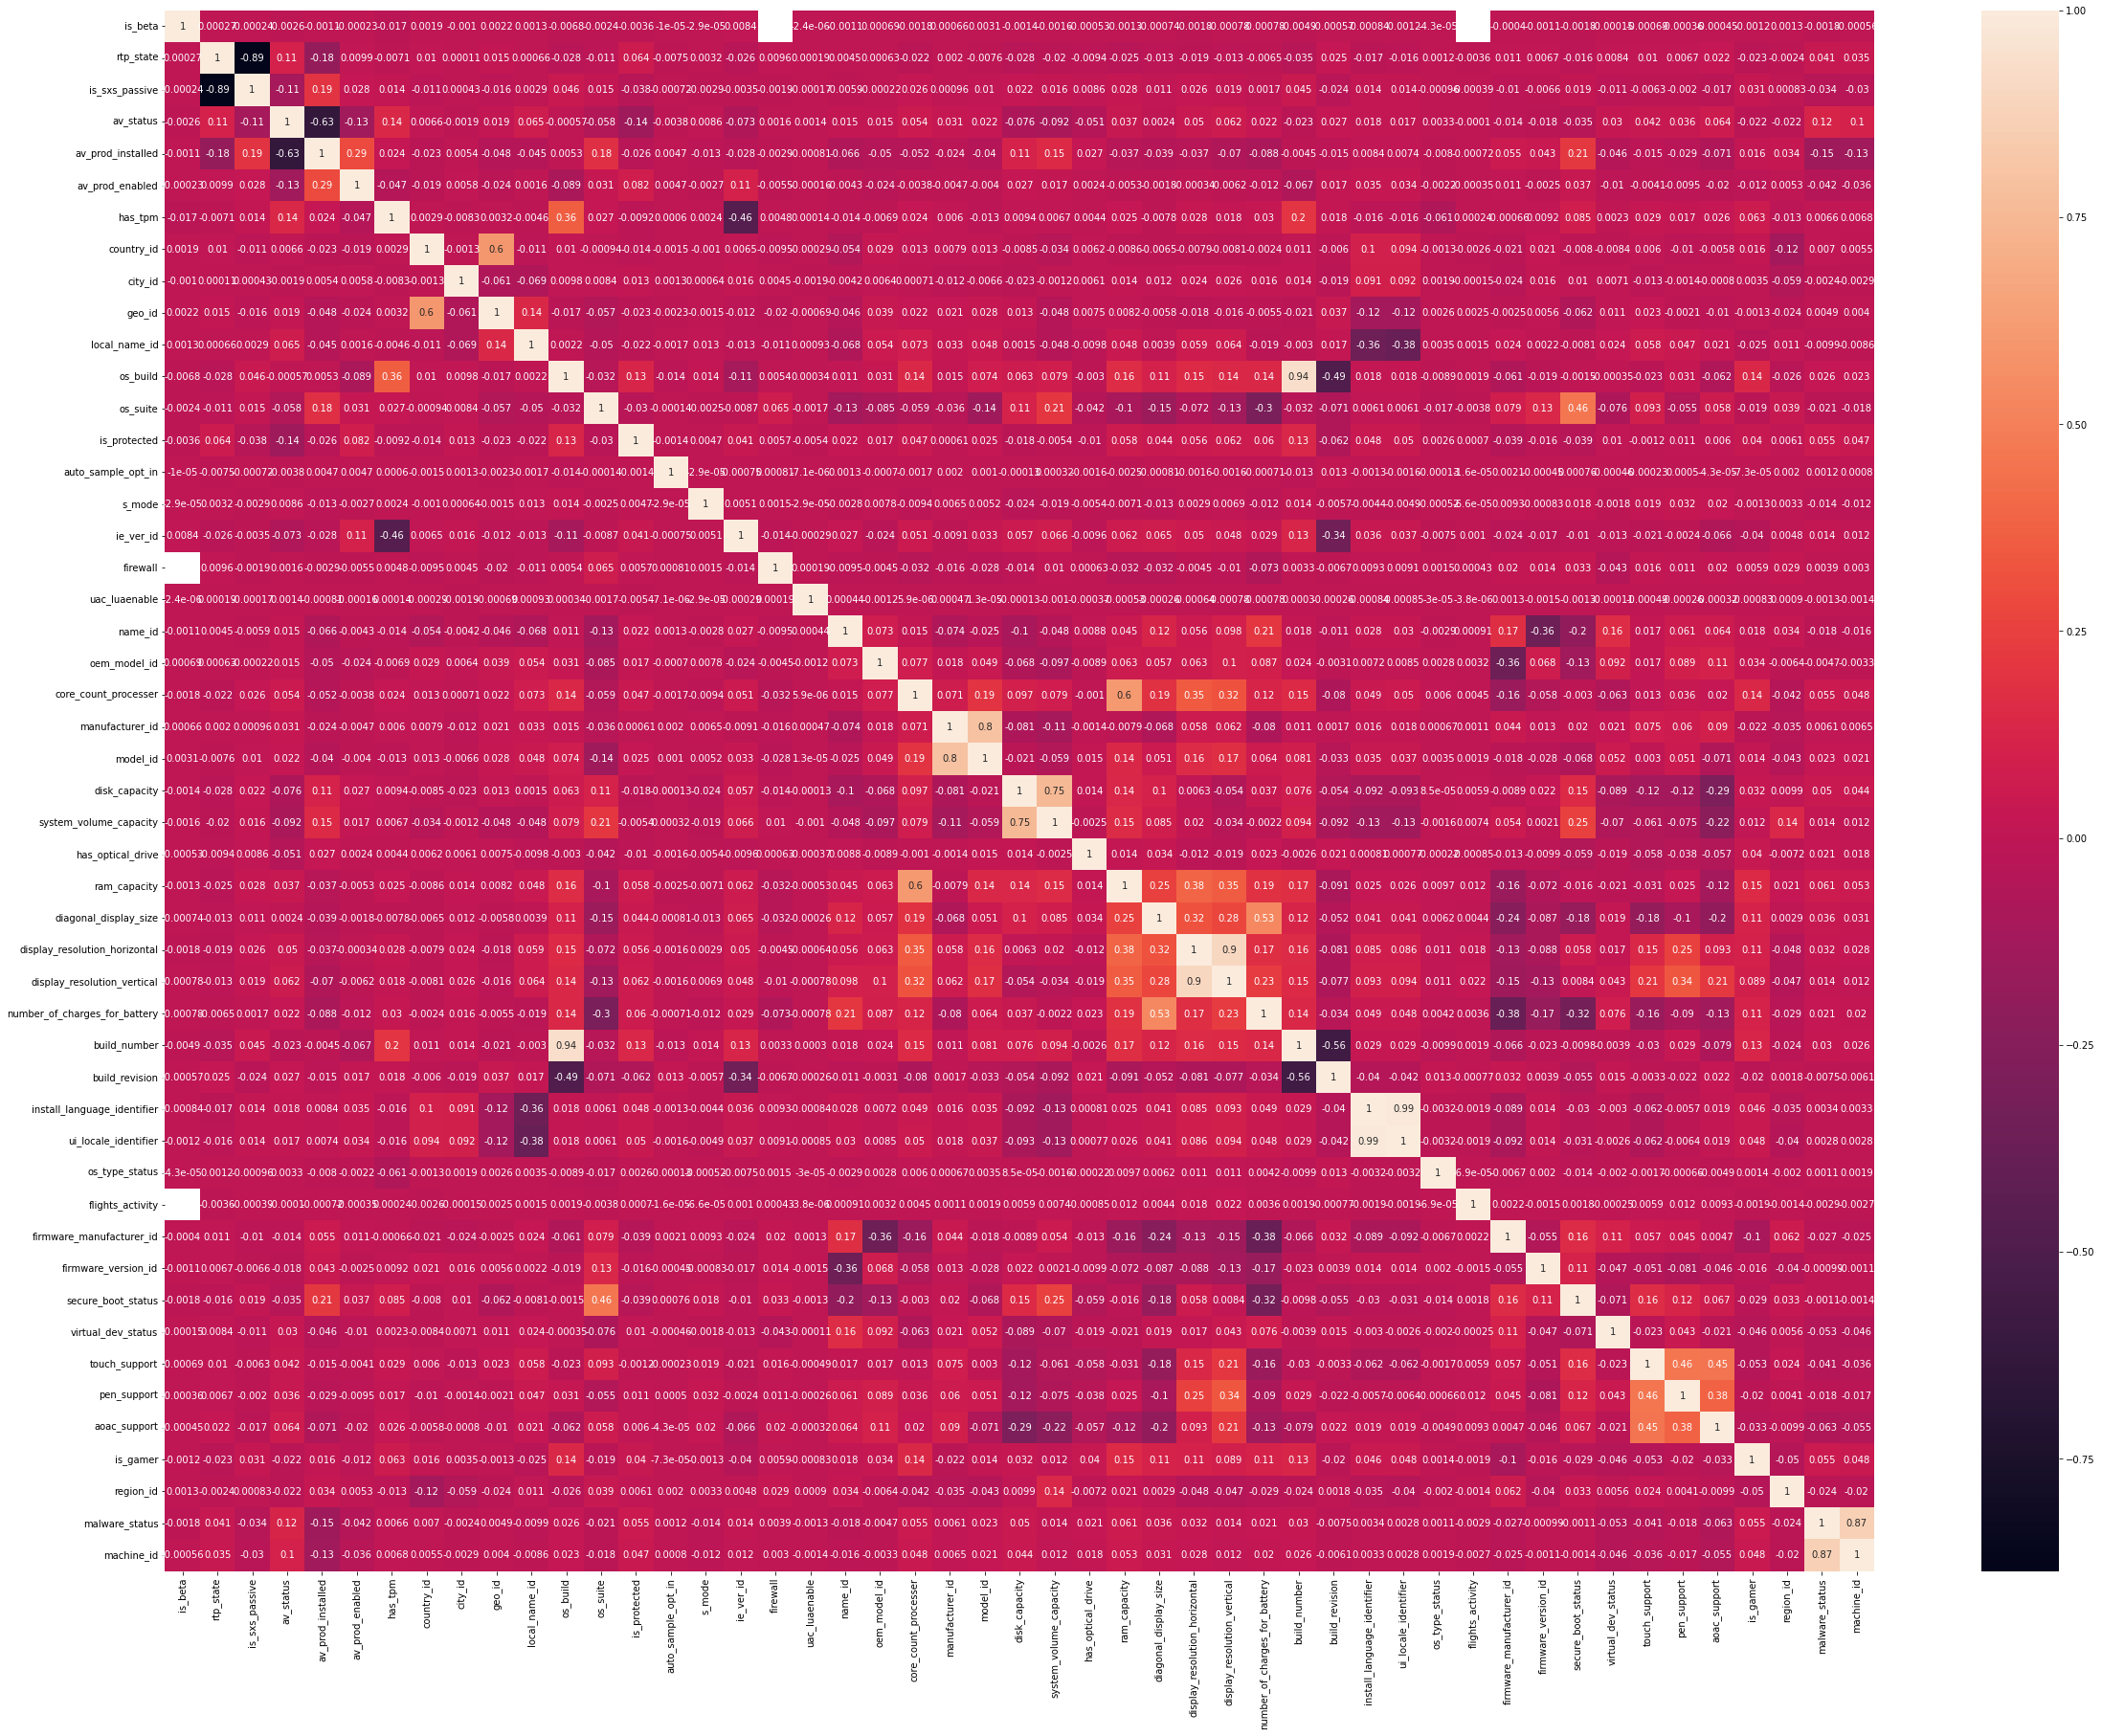

In [200]:
plt.figure(figsize=(40, 30)) # Set the figure size
sns.heatmap(train_data.corr(), annot=True)

In [201]:
train_data = train_data.drop(['build_number','manufacturer_id','disk_capacity','display_resolution_vertical','display_resolution_horizontal','install_language_identifier'],axis = 1)

<AxesSubplot:>

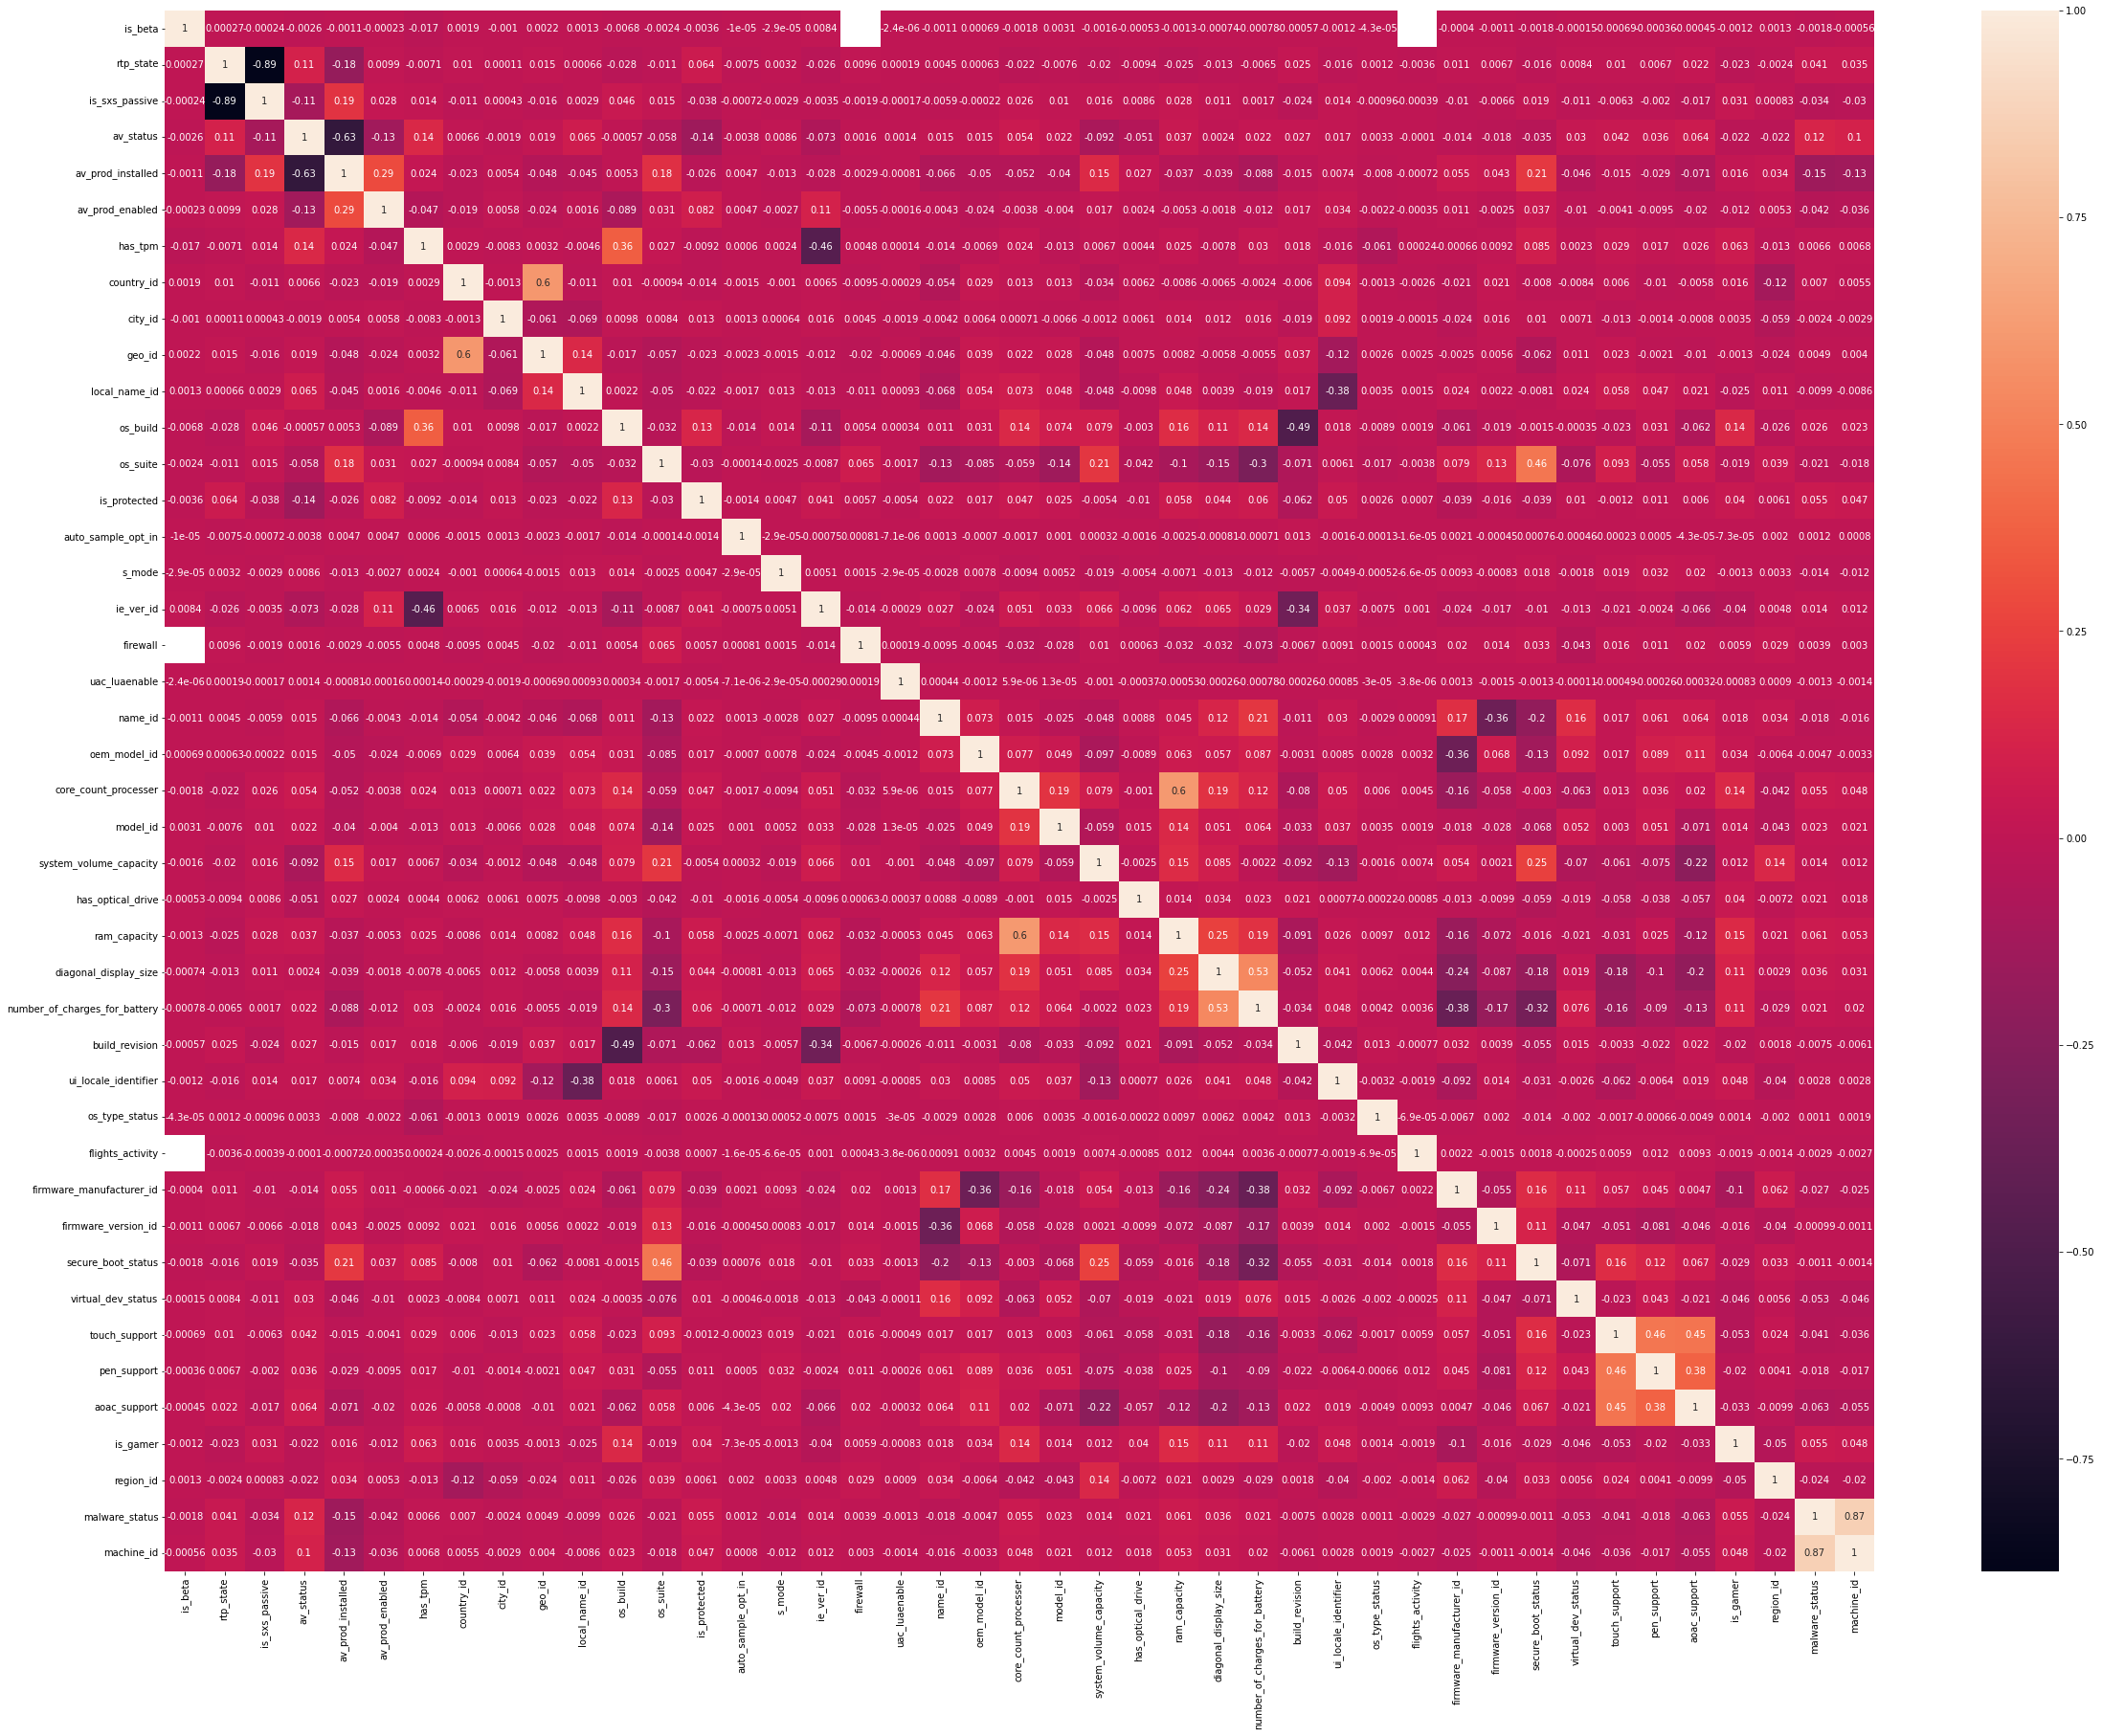

In [202]:
plt.figure(figsize=(40, 30)) # Set the figure size
sns.heatmap(train_data.corr(), annot=True)

In [203]:
# numerical_col = train_data._get_numeric_data().columns
# categorical_cols = train_data.select_dtypes(exclude=["number"]).columns
# numerical_col,categorical_cols

In [204]:
for i in train_data.columns:
    print(i,train_data[i].isnull().sum())

security_product_name 0
machine_version 0
app_version 0
av_sig_version 0
is_beta 0
rtp_state 2140
is_sxs_passive 0
av_status 2388
av_prod_installed 2388
av_prod_enabled 2388
has_tpm 0
country_id 0
city_id 21745
geo_id 16
local_name_id 0
platform 0
processor 0
os_version 0
os_build 0
os_suite 0
os_ptfm_sub_release 0
os_build_lab 3
sku_edition 0
is_protected 2377
auto_sample_opt_in 0
s_mode 36135
ie_ver_id 3877
firewall 6112
uac_luaenable 712
mdc2_form_factor 0
device_family 0
name_id 6298
oem_model_id 6766
core_count_processer 2734
model_id 2735
disk_type 873
system_volume_capacity 3520
has_optical_drive 0
ram_capacity 5328
chassis_type 44
diagonal_display_size 3143
power_profile 4
number_of_charges_for_battery 18008
version 0
architecture 0
branch 0
build_revision 0
edition 0
sku 0
install_type_name 0
ui_locale_identifier 0
auto_update_opt 0
os_type_status 0
state_name 0
activation_channel 0
flights_activity 10745
flight_ring 0
firmware_manufacturer_id 12247
firmware_version_id 10692
s

In [205]:
def makeCountPlot(data, width=0, height=4, hue=None):
  if width == 0:
    width = len(data.unique())*1.25
  plt.figure(figsize=(width, height))
  sns.countplot(x=data, hue=hue) # to see how y value varies

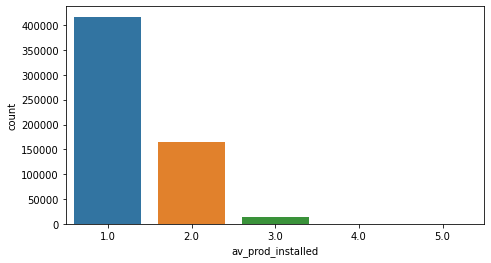

In [206]:
makeCountPlot(train_data['av_prod_installed'])
# train_data.groupby('malware_status').count()

C:\Users\reach\AppData\Local\Temp\ipykernel_39288\3088774711.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(width, height))


KeyboardInterrupt: 

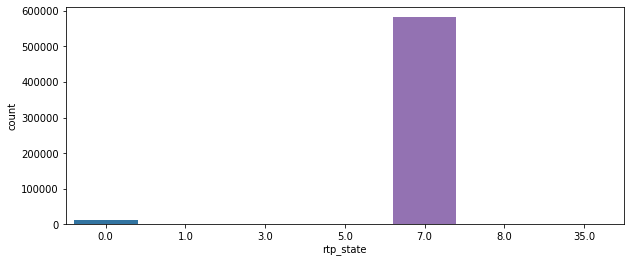

ValueError: Image size of 549630x288 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 549630x288 with 1 Axes>

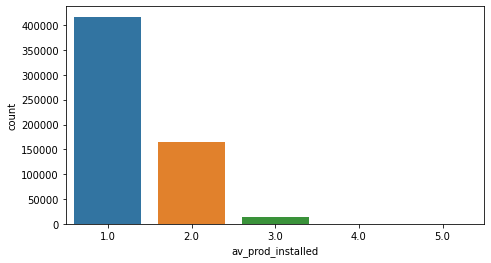

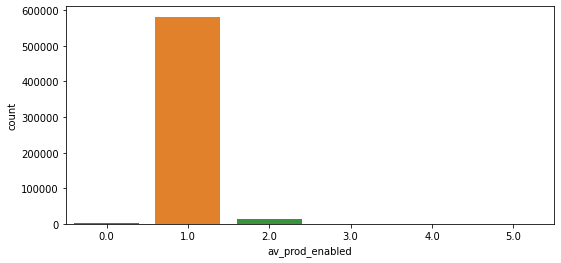

ValueError: Image size of 3637800x288 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 3.6378e+06x288 with 1 Axes>

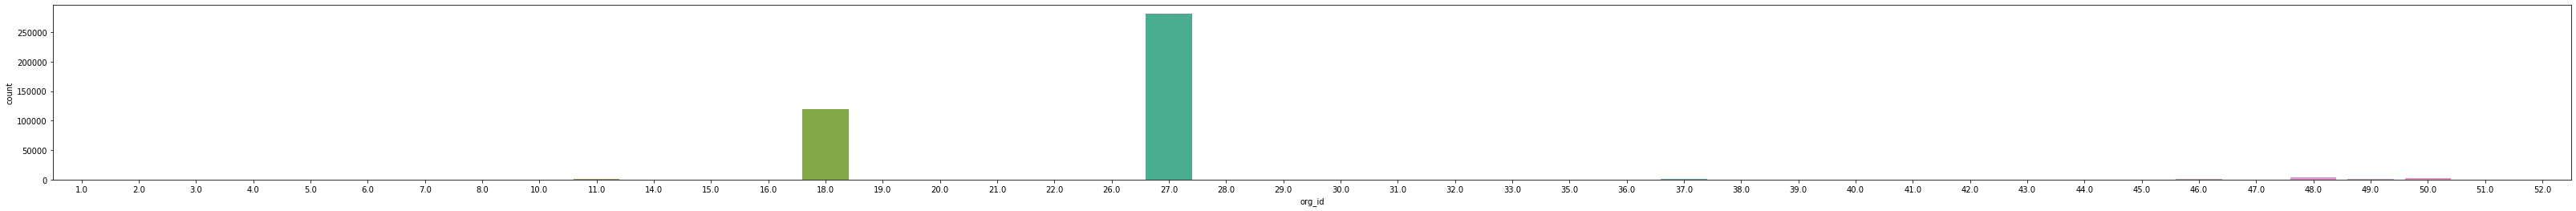

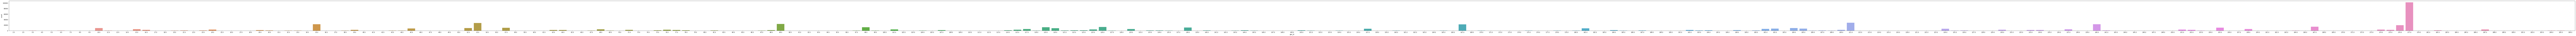

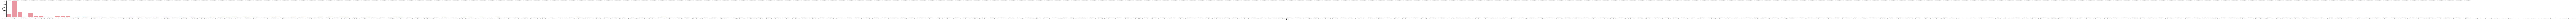

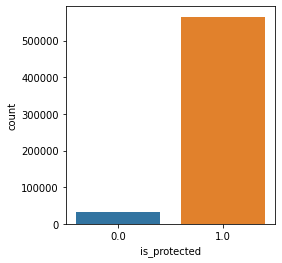

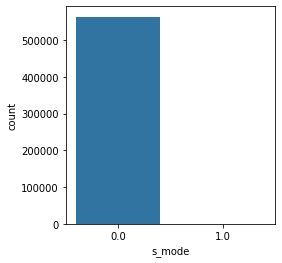

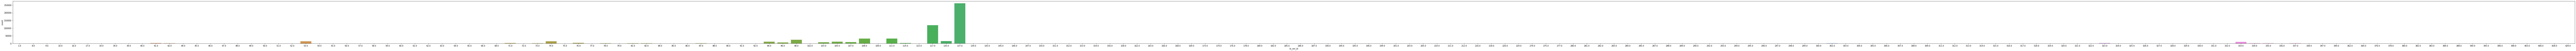

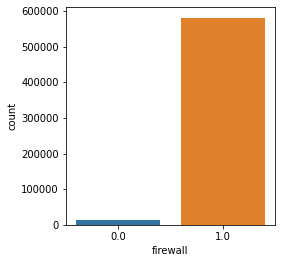

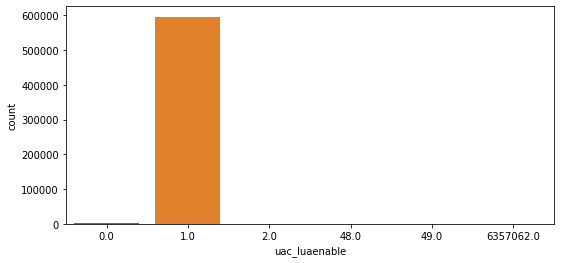

ValueError: Image size of 126180x288 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 126180x288 with 1 Axes>

ValueError: Image size of 4068720x288 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 4.06872e+06x288 with 1 Axes>

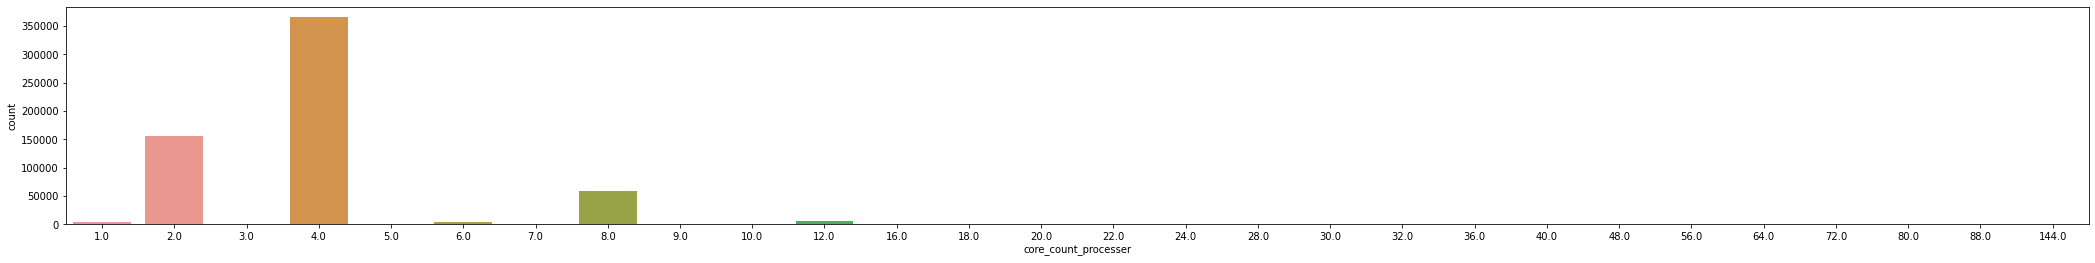

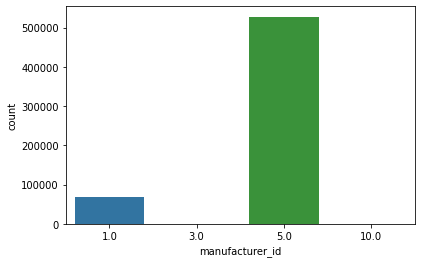

ValueError: Image size of 165420x288 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 165420x288 with 1 Axes>

ValueError: Image size of 109080x288 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 109080x288 with 1 Axes>

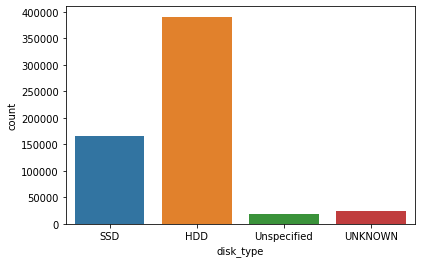

ValueError: Image size of 14265720x288 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1.42657e+07x288 with 1 Axes>

In [89]:
for i in train_data.columns:
    if train_data[i].isnull().sum()!=0:
        makeCountPlot(data = train_data[i])

ValueError: hist method requires numerical or datetime columns, nothing to plot.

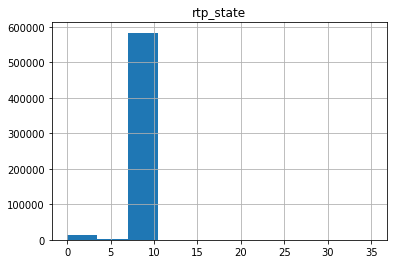

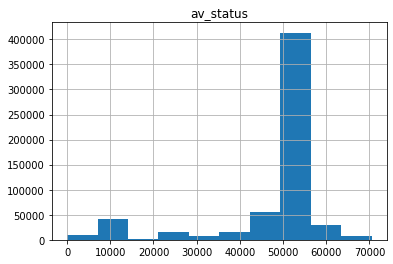

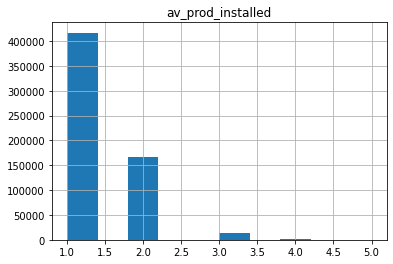

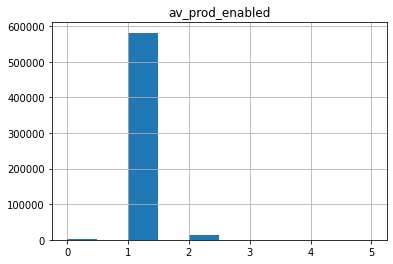

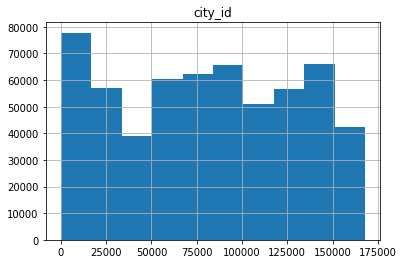

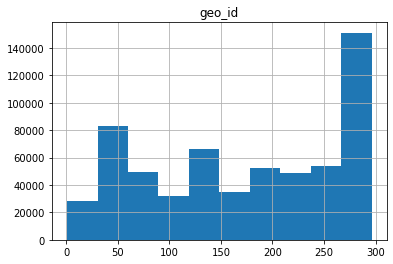

In [184]:
for i in train_data.columns:
    if train_data[i].isnull().sum()!=0:
        train_data.hist(i,nbins=20)


array([[<AxesSubplot:title={'center':'number_of_charges_for_battery'}>]],
      dtype=object)

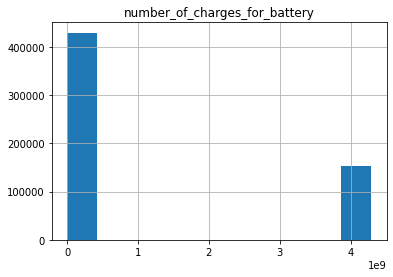

In [186]:
train_data.hist('number_of_charges_for_battery')


In [ ]:
for i in train_data.columns:
    if train_data[i].isnull().sum()!=0:
        train_data[i] = train_data[i].fillna(train_data[i].mode()[0])

In [187]:
# train_data['rtp_state'] = train_data['rtp_state'].fillna(train_data['rtp_state'].mode()[0])  # Checkout the graph on top
# train_data['ie_ver_id'] = train_data['ie_ver_id'].fillna(train_data['ie_ver_id'].mode()[0])  
# train_data['av_prod_enabled'] = train_data['av_prod_enabled'].fillna(train_data['av_prod_enabled'].mode()[0])
# train_data['av_status'] = train_data['av_status'].fillna(train_data['av_status'].mode()[0])
# train_data['core_count_processer'] = train_data['core_count_processer'].fillna(train_data['core_count_processer'].mode()[0])
# train_data['number_of_charges_for_battery'] = train_data['number_of_charges_for_battery'].fillna(train_data['number_of_charges_for_battery'].mode()[0])


# train_data['city_id'] = train_data['city_id'].fillna(train_data['city_id'].median())
# train_data['geo_id'] = train_data['geo_id'].fillna(train_data['geo_id'].median())

In [208]:
for i in train_data.columns:
    if train_data[i].isnull().sum()!=0:
        y=[]
        for j in train_data[i].unique():
            y.append(list(train_data[i]).count(j))
        print(i,train_data[i].isnull().sum(),train_data[i].unique(), y)

rtp_state 2140 [ 7. nan  0.  5.  8.  3.  1. 35.] [581732, 0, 12703, 1364, 1559, 205, 118, 1]
av_status 2388 [ 9471. 62773. 53447. ...  5688. 57157. 25201.] [1047, 17800, 391128, 247, 32358, 6747, 51, 19, 22101, 4854, 4556, 710, 163, 2940, 1516, 875, 493, 191, 154, 24, 6824, 3056, 6538, 1266, 205, 2975, 7575, 24, 7, 3026, 1, 236, 217, 1496, 167, 237, 1418, 265, 2287, 233, 7, 508, 92, 259, 351, 470, 148, 3, 136, 2, 1986, 1223, 854, 137, 306, 90, 190, 357, 224, 9, 797, 374, 2723, 36, 964, 1, 155, 1780, 87, 1614, 102, 359, 3, 47, 993, 49, 50, 106, 28, 1, 117, 1, 26, 377, 51, 1, 1, 141, 1011, 2, 260, 125, 445, 696, 66, 1, 20, 112, 53, 1, 100, 205, 391, 1, 85, 411, 187, 26, 40, 23, 3, 491, 1908, 592, 265, 289, 837, 1174, 276, 1, 46, 1, 4, 1, 246, 7, 378, 190, 561, 0, 10, 48, 5, 97, 74, 1, 415, 301, 45, 130, 3, 5, 20, 71, 45, 52, 1, 18, 828, 1, 82, 28, 204, 412, 60, 311, 50, 12, 2, 4, 746, 81, 4, 1, 18, 3, 111, 39, 150, 200, 25, 164, 51, 95, 33, 63, 451, 1, 37, 107, 10, 67, 2, 33, 1, 23, 2, 1

KeyboardInterrupt: 